# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
X.loc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

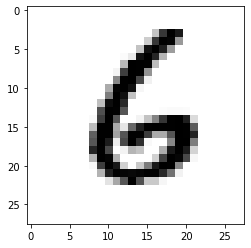

In [6]:
X_6000 = np.array(X.loc[6000])
X_6000 = X_6000.reshape(28,28)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(X_6000, cmap=plt.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

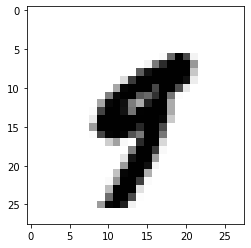

In [7]:
X_36000 = np.array(X.loc[36000])
X_36000 = X_36000.reshape(28,28)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(X_36000, cmap=plt.cm.binary, interpolation='nearest')

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [15]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [41]:
y_train_5 = np.where(y[:60000] == '5', 1, 0)
y_test_5 = np.where(y[60000:] == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train_5)

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [43]:
X_36000 = np.array(X.loc[36000])
X_36000 = X_36000.reshape(1,-1)

LR.predict(X_36000)

array([0])

In [52]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [45]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [46]:
never_5_clf.fit(X_train, y_train_5)
pred_never_5 = never_5_clf.predict(X_test)
pred_never_5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [60]:
confusion_matrix(y_test_5, y_pred)

array([[9034,   74],
       [ 147,  745]])

In [61]:
precision_score(y_test_5, y_pred)

0.9096459096459096

In [65]:
recall_score(y_test_5, y_pred)

0.8352017937219731

In [67]:
f1_score(y_test_5, y_pred)

0.8708357685563999

In [68]:
# for the never 5 test

confusion_matrix(y_test_5, pred_never_5)

array([[9108,    0],
       [ 892,    0]])

In [69]:
precision_score(y_test_5, pred_never_5)

/Users/tinghaokao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [70]:
recall_score(y_test_5, pred_never_5)

0.0

In [71]:
f1_score(y_test_5, pred_never_5)

0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [72]:
# the scores are extremely low for the never 5 test

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [73]:
from sklearn import metrics
from sklearn.metrics import roc_curve

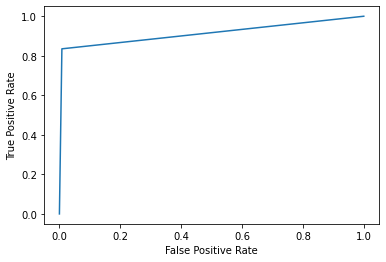

In [78]:
fpr, tpr, _ = metrics.roc_curve(y_test_5, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_5, y_pred)

0.9135385341029717

In [77]:
roc_auc_score(y_test_5, pred_never_5)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [79]:
# y_test_5 works better